**Energy efficiency**

In [3]:
# Importing the necessary
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

In [4]:
# Reading the dataset into a Pandas DataFrame
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00242/ENB2012_data.xlsx"
df = pd.read_excel(url)
print(df)


       X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0    0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1    0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2    0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3    0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4    0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28
..    ...    ...    ...     ...  ...  ..  ...  ..    ...    ...
763  0.64  784.0  343.0  220.50  3.5   5  0.4   5  17.88  21.40
764  0.62  808.5  367.5  220.50  3.5   2  0.4   5  16.54  16.88
765  0.62  808.5  367.5  220.50  3.5   3  0.4   5  16.44  17.11
766  0.62  808.5  367.5  220.50  3.5   4  0.4   5  16.48  16.61
767  0.62  808.5  367.5  220.50  3.5   5  0.4   5  16.64  16.03

[768 rows x 10 columns]


In [5]:
# Splitting the dataset into features (X) and target variable (y)
X = df.iloc[:, :-2]
y = df.iloc[:, -2:]

In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Scaling the features using StandardScaler
from sklearn.model_selection import GridSearchCV


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Defining the parameter grid for the Random Forest Regressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 4, 8],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Creating a Random Forest Regressor object
rf = RandomForestRegressor(random_state=42)

# Creating a GridSearchCV object to search over the parameter grid
rf_cv = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

# Fitting the GridSearchCV object to the training data
rf_cv.fit(X_train_scaled, y_train)

# Making predictions on the testing data using the best model
rf_y_pred = rf_cv.predict(X_test_scaled)

# Computing the R-squared and RMSE of the predictions
rf_r2 = r2_score(y_test, rf_y_pred)
rf_rmse = mean_squared_error(y_test, rf_y_pred, squared=False)

# Printing the best hyperparameters and corresponding score
print("Best Hyperparameters:", rf_cv.best_params_)
print("Best Score:", rf_cv.best_score_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Score: 0.9822579628606253


In [8]:
print(X_train, X_test, y_train, y_test)

       X1     X2     X3      X4   X5  X6    X7  X8
60   0.82  612.5  318.5  147.00  7.0   2  0.10   1
618  0.64  784.0  343.0  220.50  3.5   4  0.40   2
346  0.86  588.0  294.0  147.00  7.0   4  0.25   2
294  0.90  563.5  318.5  122.50  7.0   4  0.25   1
231  0.66  759.5  318.5  220.50  3.5   5  0.10   4
..    ...    ...    ...     ...  ...  ..   ...  ..
71   0.76  661.5  416.5  122.50  7.0   5  0.10   1
106  0.86  588.0  294.0  147.00  7.0   4  0.10   2
270  0.71  710.5  269.5  220.50  3.5   4  0.10   5
435  0.98  514.5  294.0  110.25  7.0   5  0.25   4
102  0.90  563.5  318.5  122.50  7.0   4  0.10   2

[614 rows x 8 columns]        X1     X2     X3      X4   X5  X6    X7  X8
668  0.62  808.5  367.5  220.50  3.5   2  0.40   3
324  0.66  759.5  318.5  220.50  3.5   2  0.25   1
624  0.98  514.5  294.0  110.25  7.0   2  0.40   3
690  0.79  637.0  343.0  147.00  7.0   4  0.40   4
473  0.64  784.0  343.0  220.50  3.5   3  0.25   4
..    ...    ...    ...     ...  ...  ..   ...  ..
355  0.

In [9]:
# Scaling the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# Fitting a Linear Regression model
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
lr_y_pred = lr.predict(X_test_scaled)
lr_r2 = r2_score(y_test, lr_y_pred)
lr_rmse = mean_squared_error(y_test, lr_y_pred, squared=False)

In [11]:
# Fitting a Decision Tree Regression model
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train_scaled, y_train)
dtr_y_pred = dtr.predict(X_test_scaled)
dtr_r2 = r2_score(y_test, dtr_y_pred)
dtr_rmse = mean_squared_error(y_test, dtr_y_pred, squared=False)

In [12]:
# Fitting a Random Forest Regression model
rfr = RandomForestRegressor(random_state=42)
rfr.fit(X_train_scaled, y_train)
rfr_y_pred = rfr.predict(X_test_scaled)
rfr_r2 = r2_score(y_test, rfr_y_pred)
rfr_rmse = mean_squared_error(y_test, rfr_y_pred, squared=False)

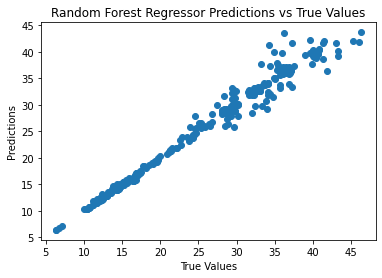

In [13]:
import matplotlib.pyplot as plt

# Plotting the true values and predictions
plt.scatter(y_test, rfr_y_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('Random Forest Regressor Predictions vs True Values')
plt.show()

In [14]:
# Printing the R-squared and RMSE of each model
print("Linear Regression R-squared:", lr_r2)
print("Linear Regression RMSE:", lr_rmse)
print("Decision Tree Regression R-squared:", dtr_r2)
print("Decision Tree Regression RMSE:", dtr_rmse)
print("Random Forest Regression R-squared:", rfr_r2)
print("Random Forest Regression RMSE:", rfr_rmse)

Linear Regression R-squared: 0.9027050781479864
Linear Regression RMSE: 3.0854044046608955
Decision Tree Regression R-squared: 0.9688442994787589
Decision Tree Regression RMSE: 1.4611130327541064
Random Forest Regression R-squared: 0.9788225922996614
Random Forest Regression RMSE: 1.2098005048864637
